JOSHUA SABHERWAL

1)Scraped data using beautiful soup, also read in html tables with messy data that were cleaned significantly, and csv tables were imported and analyzed.

2)Used regex capture groups to obtain the year column from a date column, to get names in a certian format from a messy name column and in to clean temperature data, findall from the re library used,  boolean indexing, str splits and extracts, and worked with datetime features to make meaningful results.

3)Worked with datetime onjects,  used SQL to join tables on a common index, as well as groupby and concat in pandas to group data as well as combine them successfully, and feauture engineering to generate meaningful features

4)The project explores different aspects of world football and cleans data to make interesting insights. Seaborn and matplotlib are used extensively to present some of these findings.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import re
import random
import requests
from bs4 import BeautifulSoup
import datetime

In [2]:
injuries_url = 'https://www.fantasyfootballscout.co.uk/fantasy-football-injuries/'
injury_tables = pd.read_html(injuries_url, encoding='utf-8')

injuries = injury_tables[0]
injuries.head(10)

,Name,Club,Status,Return Date,Latest News,Last Updated
0,Bellerín (Héctor),ARS,Doubt 75%,15/12/2019,Hamstring injury Pulled out of the starting XI...,11/12/2019
1,Dani Ceballos,ARS,Injured,26/12/2019,Hamstring injury Substituted with what appeare...,11/12/2019
2,Elneny (Mohamed),ARS,On Loan,01/07/2020,Joined Besiktas on loan until the end of the s...,31/08/2019
3,Holding (Rob),ARS,Injured,29/12/2019,Knee injury Missed the West Ham game on 9/12 d...,11/12/2019
4,Jenkinson (Carl),ARS,Unavailable,Unknown,Joined Nottingham Forest on a permanent deal o...,07/08/2019
5,Koscielny (Laurent),ARS,Unavailable,Unknown,Joined Bordeaux on a permanent deal on 6/8.,08/08/2019
6,Mkhitaryan (Henrikh),ARS,On Loan,01/07/2020,Joined Roma on loan until the end of the seaso...,02/09/2019
7,Monreal (Nacho),ARS,Unavailable,Unknown,Joined Real Sociedad on a permanent deal on 31...,31/08/2019
8,Eddie Nketiah,ARS,On Loan,01/07/2020,Joined Leeds United on loan until the end of t...,08/08/2019
9,Pepe (Nicolas),ARS,Doubt 75%,15/12/2019,Knee injury Suffered bruising to his knee in t...,11/12/2019


Here we are taking a look at the injuries data from fanatasyfootballscout and simply reading it with pandas read_html function. We need the first table on the website and that's indexed at 0. We can see our output using the head function.

Now we get rid of players that are either unavailable or on loan, where unavailable means that they have permanently left the club

In [3]:
injuries.dtypes
injuries['Status'] = injuries['Status'].astype('str') 
(injuries['Status']=='On Loan')| (injuries['Status']=='Unavailable')
injuries = injuries[-((injuries['Status']=='On Loan')|(injuries['Status']=='Unavailable')|(injuries['Status']=='Suspended') )]
injuries

,Name,Club,Status,Return Date,Latest News,Last Updated
0,Bellerín (Héctor),ARS,Doubt 75%,15/12/2019,Hamstring injury Pulled out of the starting XI...,11/12/2019
1,Dani Ceballos,ARS,Injured,26/12/2019,Hamstring injury Substituted with what appeare...,11/12/2019
3,Holding (Rob),ARS,Injured,29/12/2019,Knee injury Missed the West Ham game on 9/12 d...,11/12/2019
9,Pepe (Nicolas),ARS,Doubt 75%,15/12/2019,Knee injury Suffered bruising to his knee in t...,11/12/2019
10,Tierney (Kieran),ARS,Injured,Unknown,Shoulder injury Substituted during the win ove...,11/12/2019
...,...,...,...,...,...,...
150,Lanzini (Manuel),WHU,Injured,01/01/2020,Shoulder injury Taken off with a fractured col...,07/12/2019
152,Wilshere (Jack),WHU,Doubt 75%,14/12/2019,Abdominal injury Missed the match against Spur...,09/12/2019
153,Yarmolenko (Andriy),WHU,Doubt 75%,14/12/2019,Back injury Missed the defeat to Arsenal on 9/...,10/12/2019
154,Boly (Willy),WOL,Injured,Unknown,Ankle injury Sustained a broken ankle on 26/10...,06/12/2019


We then filter the name columns in the dataset. We have three kinds of names types in this column.
The first type is a full name as (Lastname, Firstname)
the second type is just a single name (mostly brazilian/portugese players) such as 'Bernard'
the third is a new formatting the website uses, with a first name followed by a last name.

After correctly formatting their names, I merged the correctly formatted names to the start of the data, hence cleaning this column

In [4]:
injuries['last_name'] = injuries['Name'].str.split('(').str.get(0)
 
injuries['first_name'] = injuries['Name'].str.split('(').str.get(1).str.strip(')')
 
injuries['full_name'] = injuries['first_name'] + ' ' + injuries['last_name']
injuries_isol = injuries.dropna()

#Now looking at players whos name was formatted as First name followed by last name
nans = injuries[injuries['full_name'].isna()]
nans[['first_name','last_name']] = nans['Name'].str.extract('(?P<first_name>[a-zA-Z]+) (?P<last_name>.*)')
nans['full_name'] = nans['first_name'] + ' ' + nans['last_name']
nans_isol = nans.dropna()

#Looking at players with only one name (Brazilian players are a good example)
lnans = nans[nans['full_name'].isna()]
lnans['full_name'] = lnans['Name'].str.extract('(?P<full_name>[a-zA-Z]+)')

#Getting all the results together in a table
result = pd.concat([injuries_isol, nans_isol, lnans], axis=0)
result.sort_values('Club')
result = result[['full_name', 'Club', 'Status', 'Return Date', 'Latest News', 'Last Updated']]

result.tail(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,full_name,Club,Status,Return Date,Latest News,Last Updated
27,A Smith,BOU,Injured,Unknown,Ankle injury Taken off with an ankle injury ag...,06/12/2019
38,Solly March,BHA,Injured,01/01/2020,Groin Injury Revealed to have a tight groin ah...,07/12/2019
90,Diogo Dalot,MUN,Doubt 75%,15/12/2019,Lack of match fitness Has recovered from a gro...,11/12/2019
145,Xande Silva,WHU,Injured,Unknown,Abdominal injury Had stomach surgery in pre-se...,16/08/2019
42,Gudmundsson,BUR,Injured,21/12/2019,Hamstring injury Pulled out of the Iceland squ...,12/12/2019
47,Westwood,BUR,Doubt 75%,14/12/2019,Groin Injury Will be assessed for a slight gro...,12/12/2019
70,Andr,EVE,Injured,Unknown,Ankle injury Suffered a fracture dislocation t...,06/12/2019
81,Fabinho,LIV,Injured,02/01/2020,Ankle injury Ruled out until the New Year afte...,29/11/2019
85,Sane,MCI,Injured,Unknown,Knee injury Limped out of the Community Shield...,08/08/2019
86,Ederson,MCI,Doubt 75%,15/12/2019,Illness Took ill before the Champions League m...,11/12/2019


Now I will attempt to use datetimes. Now that the dates are in datetime format, we can use them to filter our data however we want. We now attempt to look at the players that are currently injured and have a chance to play the next game the following weekend.

In [5]:
result['Last Updated'] = pd.to_datetime(injuries['Last Updated'], format='%d/%m/%Y')

today = datetime.date.today()
last_week = today - datetime.timedelta(days=7)

recent = result[result['Last Updated'] >= last_week]
recent.head()

#Specifying the date for the next set of fixtures
next_fixtures = datetime.datetime(2019, 12, 17)

return_date = result[result['Return Date'] != 'Unknown']
return_date['Return Date'] = pd.to_datetime(return_date['Return Date'], format='%d/%m/%Y')

return_too_late = return_date[return_date['R
                                          ate'] >= next_fixtures]
return_on_time = return_date[return_date['Return Date'] <= next_fixtures]
return_on_time=return_on_time.set_index('Return Date')
return_on_time.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,full_name,Club,Status,Latest News,Last Updated
Return Date,,,,,
2019-12-15,Héctor Bellerín,ARS,Doubt 75%,Hamstring injury Pulled out of the starting XI...,2019-12-11
2019-12-15,Nicolas Pepe,ARS,Doubt 75%,Knee injury Suffered bruising to his knee in t...,2019-12-11
2019-12-14,Tyrone Mings,AVL,Doubt 75%,Hamstring injury Taken off with a hamstring in...,2019-12-08
2019-12-14,Matt Targett,AVL,Doubt 75%,Knock Substituted during the defeat to Leicest...,2019-12-09
2019-12-14,Nathan Aké,BOU,Doubt 75%,Hamstring injury Taken off with a suspected ha...,2019-12-07


Now we use beautifulsoup to extract the Live premier league table from bbc.com

In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url="https://www.bbc.com/sport/football/premier-league/table"
r  = requests.get(url)
data = r.text

soup = BeautifulSoup(data)
big_list = []

for row in soup.find_all('tr'):
    count = 1
    for col in row.find_all('td'):
        if (count % 14 != 0):
            big_list.append(col.text)
            count +=1

def split_list (x):
   return [big_list[i:i+x] for i in range(0, len(big_list), x)]

f = split_list(12)
df = pd.DataFrame(f, columns = ['Position','Rdm','Team','P','W','L','D','F','A','GD','Pts','Form']) 
df.head()

,Position,Rdm,Team,P,W,L,D,F,A,GD,Pts,Form
0,1,team hasn't moved,Liverpool,16,15,1,0,40,14,26,46,WWon 3 - 1 against Manchester City on November...
1,2,team hasn't moved,Leicester,16,12,2,2,39,10,29,38,WWon 2 - 0 against Arsenal on November 9th 201...
2,3,team hasn't moved,Man City,16,10,2,4,44,19,25,32,LLost 1 - 3 against Liverpool on November 10th...
3,4,team hasn't moved,Chelsea,16,9,2,5,31,24,7,29,WWon 2 - 0 against Crystal Palace on November ...
4,5,team hasn't moved,Man Utd,16,6,6,4,25,19,6,24,WWon 3 - 1 against Brighton & Hove Albion on N...


We will now clean this data, make better features and use the data to make interesting visualizations. We drop the columns that are of no interest to us, and create columns with interesting results like the Goals ratio, Goals/game, Goals conceded/game

In [7]:
epl = df.drop(['Rdm'], axis=1)
epl.drop(epl.tail(1).index, inplace=True)
epl[['W','L','D','GD','Pts','F','A','P']] = epl[['W','L','D','GD','Pts','F','A','P']].apply(pd.to_numeric)
epl.drop(['Form'], axis=1, inplace = True)

epl['Goal ratio'] = round((epl['F'] / epl['A']), 2)
epl['Goals/game'] = round((epl['F'] / epl['P']), 2)
epl['Goals conceded/game'] = round((epl['A'] / epl['P']),2)
epl['Win Ratio'] = round((epl['W'] / epl['P']),2)
# epl.sort_values(['Goals/game']).head(5)
epl.head()

,Position,Team,P,W,L,D,F,A,GD,Pts,Goal ratio,Goals/game,Goals conceded/game,Win Ratio
0,1,Liverpool,16,15,1,0,40,14,26,46,2.86,2.50,0.88,0.94
1,2,Leicester,16,12,2,2,39,10,29,38,3.90,2.44,0.62,0.75
2,3,Man City,16,10,2,4,44,19,25,32,2.32,2.75,1.19,0.62
3,4,Chelsea,16,9,2,5,31,24,7,29,1.29,1.94,1.50,0.56
4,5,Man Utd,16,6,6,4,25,19,6,24,1.32,1.56,1.19,0.38


Starting off with a simple bar graph for goal difference, we can see which teams are performing well when it comes to scoring lots of goals and conceding the fewest.

In [8]:
#Looking at the Goal Difference across teams

import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
plt.barh(epl['Team'], epl['GD'])
plt.show()


<Figure size 640x480 with 1 Axes>

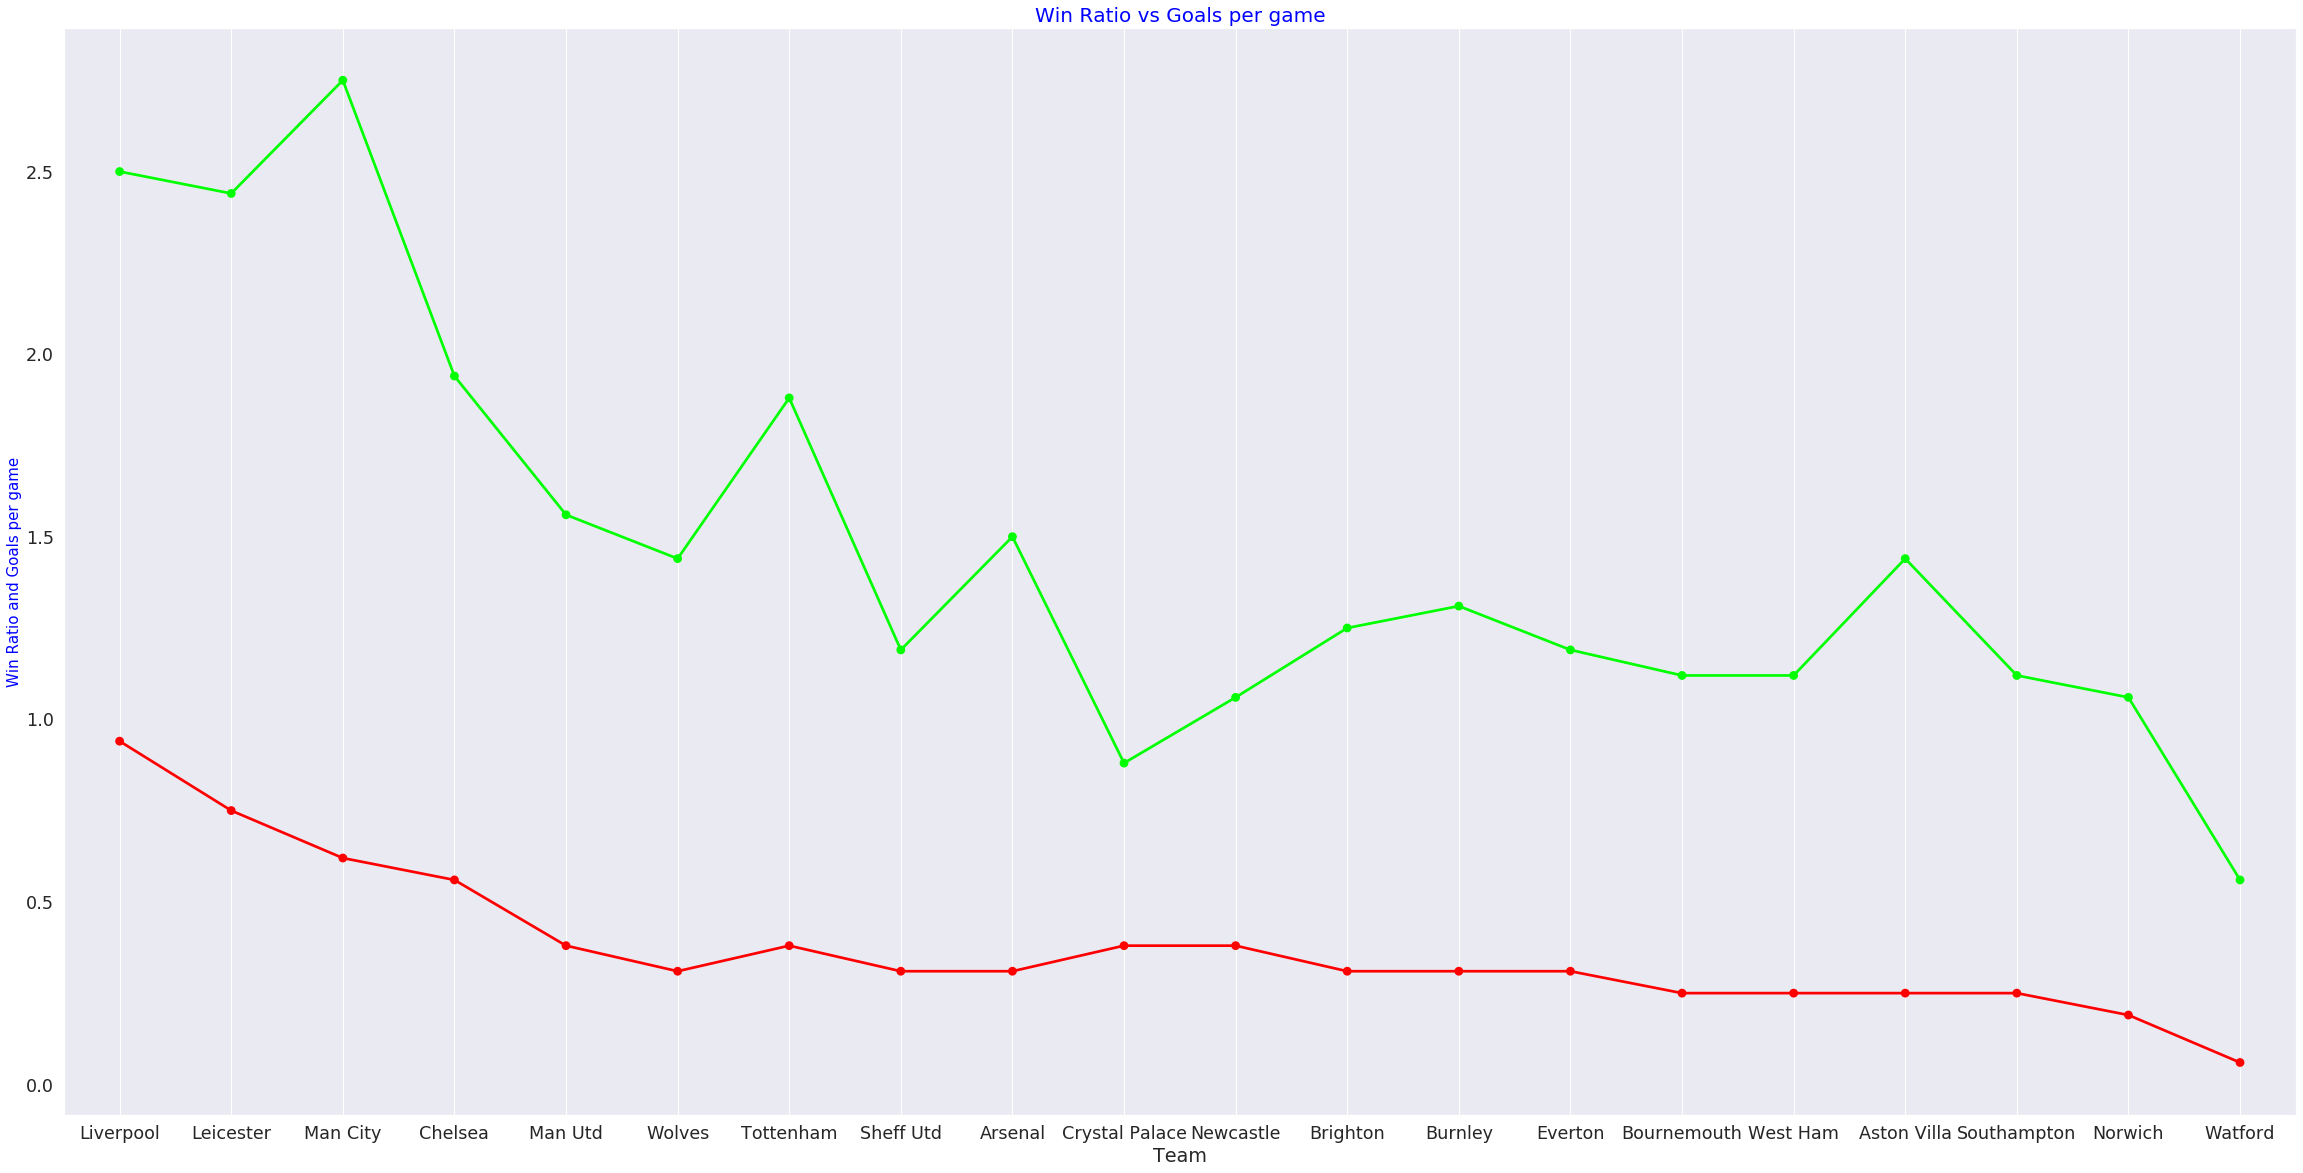

In [9]:
import seaborn as sns
sns.set(font_scale=1.6) 
epl_top6 = epl.head(20)
f,ax1 = plt.subplots(figsize =(40,20))
sns.pointplot(x='Team',y='Goals/game',data=epl_top6,color='lime',alpha=0.8)
sns.pointplot(x='Team',y='Win Ratio',data=epl_top6,color='red',alpha=0.8)
plt.ylabel('Win Ratio and Goals per game',fontsize = 15,color='blue')
plt.title('Win Ratio vs Goals per game',fontsize = 20,color='blue')
plt.grid()


Using the fifa dataset below, we are able to extract Useful data about each Premier League player.

In [10]:
transfers = pd.read_csv('english_premier_league.csv')
fifa = pd.read_csv('players_20.csv')

In [11]:
players = fifa[['short_name', 'nationality', 'wage_eur', 'overall', 'club', 'dob']]
players.rename({"nationality": "nation"}, axis=1, inplace=True)
teams = ['Arsenal','Aston Villa','Brighton & Hove Albion','Burnley','Chelsea','Crystal Palace','Everton','Leicester City','Liverpool','Manchester City','Manchester United','Newcastle United','Norwich City','Sheffield United','Southampton','Tottenham Hotspur','Watford','West Ham United' ,'Wolverhampton Wanderers']
players = players[players['club'].isin(teams)]
players.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,short_name,nation,wage_eur,overall,club,dob
5,K. De Bruyne,Belgium,370000,91,Manchester City,1991-06-28
7,V. van Dijk,Netherlands,200000,90,Liverpool,1991-07-08
9,M. Salah,Egypt,240000,90,Liverpool,1992-06-15
12,H. Kane,England,220000,89,Tottenham Hotspur,1993-07-28
13,Alisson,Brazil,155000,89,Liverpool,1992-10-02


In [12]:
players[['year','month','day']] = players['dob'].str.extract('(?P<year>\d+.?)(?P<month>\d+.?)(?P<day>\d?)')
players
players['year'] = players['year'].str.split('-').str.get(0)
players= players.drop(['dob','month','day'], axis=1)
players

,short_name,nation,wage_eur,overall,club,year
5,K. De Bruyne,Belgium,370000,91,Manchester City,1991
7,V. van Dijk,Netherlands,200000,90,Liverpool,1991
9,M. Salah,Egypt,240000,90,Liverpool,1992
12,H. Kane,England,220000,89,Tottenham Hotspur,1993
13,Alisson,Brazil,155000,89,Liverpool,1992
...,...,...,...,...,...,...
17585,J. Ramsey,England,3000,53,Aston Villa,2001
17645,J. Cox,England,5000,53,Aston Villa,1998
17655,G. McMahon,England,2000,53,Burnley,2000
17852,C. Rowe,England,4000,52,Aston Villa,1999


We can now take a look at the totall wage of players grouped by the year in which they were born

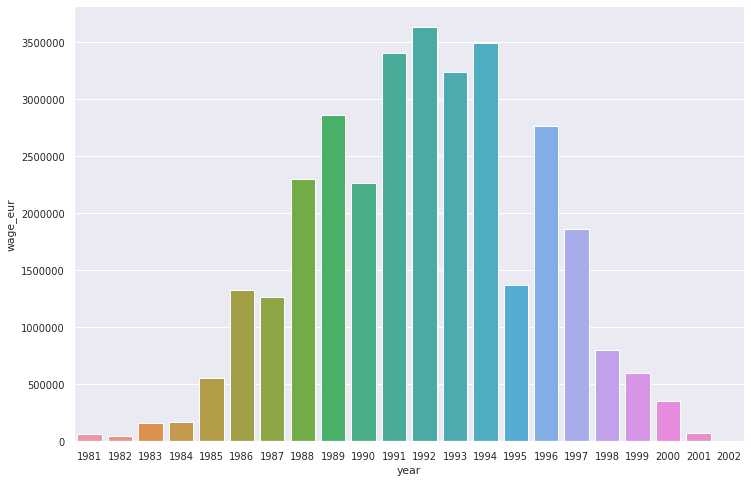

In [13]:
sns.set(font_scale=0.9) 
y = players.groupby(['year']).sum()
y = y['wage_eur']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
plt.show();

Now we will import the temperature data from Wikipedia so that we can have a feature that tells us the average temperature of each each nation of players that play in the English Premier League. To merge the data we will use SQL

In [14]:
temp_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_extreme_temperatures'
temperature_info = pd.read_html(temp_url, encoding='utf-8')
temp = temperature_info[1]
temp.drop(['Town/Location', 'Town/Location.1', 'Date', 'Date.1'], axis=1, inplace = True)
temp.rename({"Country/Region": "nation"}, axis=1, inplace=True)

temp['celsius_low'] = temp['Lowest temperature'].str.extract('(?P<celsius_low>\d+\.*\d*)')
temp['celsius_high'] = temp['Highest temperature'].str.extract('(?P<celsius_high>\d+\.*\d*)')
temp.drop(['Lowest temperature','Highest temperature'], axis=1, inplace = True)
temp['celsius_high'] = temp.celsius_high.astype(float)
temp['celsius_low'] = temp.celsius_low.astype(float)
temp['celsius_low'].fillna((temp['celsius_low'].mean()), inplace=True)
temp['celsius_high'].fillna((temp['celsius_high'].mean()), inplace=True)
temp['average_temp'] = temp[['celsius_low', 'celsius_high']].mean(axis=1)
temp = temp.round(2)
temp.drop(['celsius_low', 'celsius_high'], axis=1, inplace = True)
temp.head()

,nation,average_temp
0,Algeria,32.55
1,Botswana,36.37
2,Burkina Faso,26.10
3,Chad,38.17
4,Ghana,36.02


In [15]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [16]:
players.to_sql('players', con=engine, if_exists = 'replace')
temp.to_sql('temps', con=engine, if_exists = 'replace')
merged = pd.DataFrame(engine.execute('select * from "players" join "temps" on "temps".nation = "players".nation').fetchall())
merged = merged.drop([0], axis = 1)
merged = merged.drop([7,8], axis = 1)
merged
merged.columns = ['Name','Nationality','Wage','Overall','Team','Year','Nation_Temp']
merged.head()

,Name,Nationality,Wage,Overall,Team,Year,Nation_Temp
0,K. De Bruyne,Belgium,370000,91,Manchester City,1991,35.95
1,V. van Dijk,Netherlands,200000,90,Liverpool,1991,34.05
2,M. Salah,Egypt,240000,90,Liverpool,1992,33.00
3,Alisson,Brazil,155000,89,Liverpool,1992,29.35
4,De Gea,Spain,205000,89,Manchester United,1990,38.65


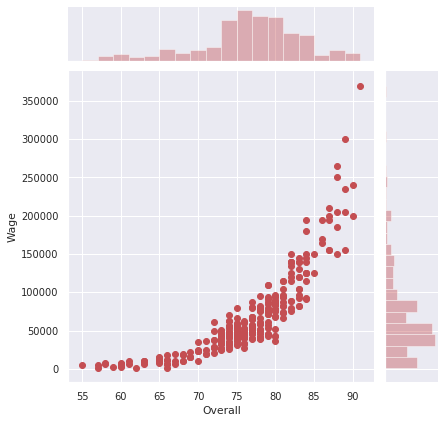

In [17]:
g = sns.jointplot("Overall", "Wage", data=merged, color="r")

As we can see above, there is a very strong correlation between a players overall and his wage. 

Text(0.5, 1.0, 'Countries reperesented in the premier league')

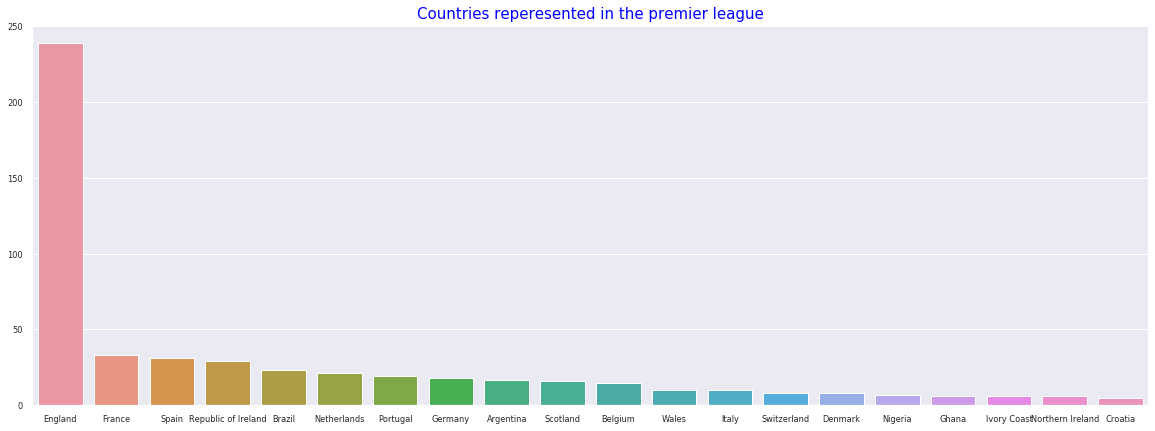

In [18]:
sns.set(font_scale=0.75) 
state = players['nation'].value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Countries reperesented in the premier league',color = 'blue',fontsize=15)

Unsurprisingly, English players are the most in the league, let's finally analyze the player with the highest wage in the league

In [19]:
kdb = merged.loc[merged['Wage'].idxmax()]
kdb

Name              K. De Bruyne
Nationality            Belgium
Wage                    370000
Overall                     91
Team           Manchester City
Year                      1991
Nation_Temp              35.95
Name: 0, dtype: object

We will see all the years KDB has won individual awards in from his individual award section in https://en.wikipedia.org/wiki/Kevin_De_Bruyne#Honours

In [20]:
Awards = r"""Bundesliga Young Player of the Year: 2012–13[181]
Bundesliga Player of the Year: 2014–15[182]
Bundesliga Team of the Year: 2014–15[183]
UEFA Europa League Squad of the Season: 2014–15[184]
Footballer of the Year in Germany: 2015[12]
France Football World XI: 2015[185]
Belgian Sportsman of the Year: 2015[186]
Manchester City Player of the Year: 2015–16, 2017–18[187][188]
FIFA FIFPro World11 2nd team: 2018[189]
FIFA FIFPro World11 3rd team: 2016[190]
FIFA FIFPro World11 nominee: 2019 (8th midfielder)[191]
IFFHS Men's World Team: 2017[192], 2019[193]
UEFA Team of the Year: 2017[194]
PFA Team of the Year: 2017–18 Premier League[195]
Premier League Playmaker of the Season: 2017–18[173]
UEFA Champions League Squad of the Season: 2017–18,[196] 2018–19[197]
FIFA World Cup Dream Team: 2018[198]"""

years = re.findall(r'[0-9]{4}',Awards)
output = []
for x in years:
    if x not in output:
        output.append(x)
print(output)

['2012', '2014', '2015', '2017', '2018', '2016', '2019']
